In [ ]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def plot_one_image(image: np.ndarray) -> None:
    """
    Отобразить изображение с помощью matplotlib.
    Вспомогательная функция.

    :param image: изображение для отображения
    :return: None
    """
    fig, axs = plt.subplots(1, 1, figsize=(8, 7))

    axs.imshow(image)
    axs.axis('off')
    plt.plot()

In [ ]:
def apply_warpAffine(image, points1: np.array, points2: np.array):
    """
    Применяет перспективное преобразование к изображению.

    Args:
        image (np.ndarray): Исходное изображение, к которому будет применяться преобразование.
        points1 (list of tuple): Список координат точек в исходном изображении (4 точки).
        points2 (list of tuple): Список координат точек в целевом изображении (4 точки).

    Returns:
        np.ndarray: Преобразованное изображение.
    """

    if len(points1) != 3 or len(points2) != 3:
      raise ValueError("Нужны три точки для преобразования изображения!")

    matrix = cv2.getAffineTransform(np.float32(points1), np.float32(points2))

    transformed_image = cv2.warpAffine(image,matrix, (image.shape[1], image.shape[0]))

    return transformed_image

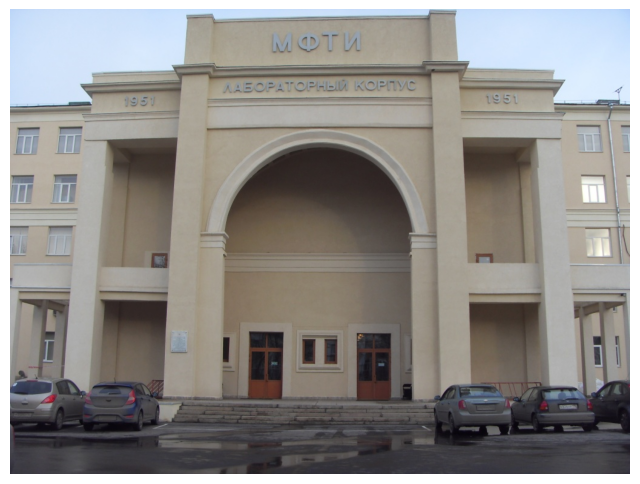

In [ ]:
test_image = cv2.imread('/content/lk.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plot_one_image(test_image)

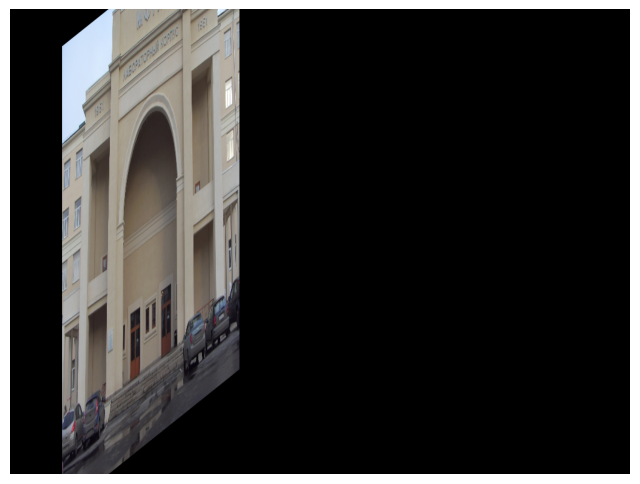

In [ ]:
test_point_1 = np.float32([[50, 50], [400, 50], [50, 200]])
test_point_2 = np.float32([[100, 100], [200, 20], [100, 250]])

transformed_image = apply_warpAffine(test_image, test_point_1, test_point_2)
plot_one_image(transformed_image)